In [3]:
import pandas as pd

from os import path

In [2]:
DATA_DIR = "../data/meli"

## Dataset Load

In [4]:
train_data = pd.read_csv(path.join(DATA_DIR, "train.csv.gz"))
train_data.head()

,title,label_quality,language,category
0,Hidrolavadora Lavor One 120 Bar 1700w Bomba A...,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,Placa De Sonido - Behringer Umc22,unreliable,spanish,SOUND_CARDS
2,Maquina De Lavar Electrolux 12 Kilos,unreliable,portuguese,WASHING_MACHINES
3,Par Disco De Freio Diant Vent Gol 8v 08/ Frema...,unreliable,portuguese,VEHICLE_BRAKE_DISCS
4,Flashes Led Pestañas Luminoso Falso Pestañas P...,unreliable,spanish,FALSE_EYELASHES


In [5]:
test_data = pd.read_csv(path.join(DATA_DIR, "test.csv"))
test_data.head()

,id,title,language
0,0,Kit Maternidade Bolsa-mala Baby/bebe Vinho Men...,portuguese
1,1,Trocador De Fraldas Fisher Price Feminino Rosa...,portuguese
2,2,Motor Ventoinha - Fiat Idea / Palio 1.8 - A 04...,portuguese
3,3,Amortecedor Mola Batente D Dir New Civic 14 - ...,portuguese
4,4,Cadeirinha De Carro Bebê Princesa Princess 9 A...,portuguese


## EDA

### Train Data

In [12]:
train_data.shape

(20000000, 4)

In [7]:
train_data.label_quality.value_counts()

unreliable    18815755
reliable       1184245
Name: label_quality, dtype: int64

In [8]:
train_data.language.value_counts()

spanish       10000000
portuguese    10000000
Name: language, dtype: int64

In [11]:
train_data[train_data.label_quality == "reliable"].language.value_counts()

portuguese    693318
spanish       490927
Name: language, dtype: int64

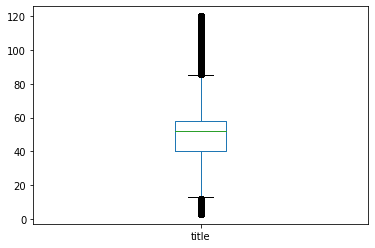

In [19]:
train_data.title.str.len().plot.box()

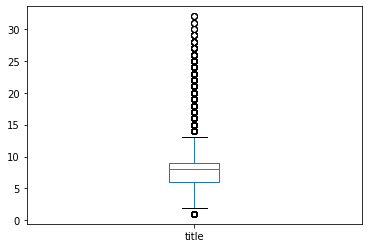

In [21]:
train_data.title.str.split().apply(lambda x: len(x)).plot.box()

In [9]:
train_data.category.value_counts()

PANTS                                   35973
COFFEE_MAKERS                           35104
BABY_CAR_SEATS                          34163
MUSICAL_KEYBOARDS                       33222
MATTRESSES                              32967
                                        ...  
CONSTRUCTION_LIME_BAGS                    206
COLD_FOOD_AND_DRINK_VENDING_MACHINES      162
PAINTBALL_SMOKE_GRENADES                  154
COMMERCIAL_POPCORN_MACHINES               141
HAMBURGER_FORMERS                         109
Name: category, Length: 1588, dtype: int64

### Test data

In [15]:
test_data.shape

(246955, 3)

In [10]:
test_data.language.value_counts()

spanish       124987
portuguese    121968
Name: language, dtype: int64

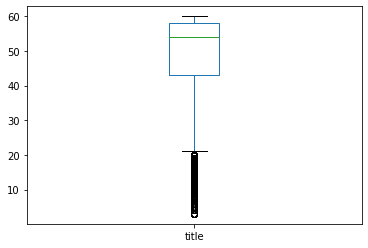

In [20]:
test_data.title.str.len().plot.box()

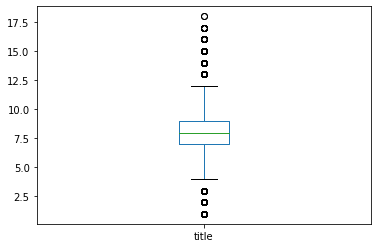

In [22]:
test_data.title.str.split().apply(lambda x: len(x)).plot.box()

## Steps to follow and ideas

- Separate the models for each language.
- Create a tokenized version of the titles for both train and test and save them.
- Establish a baseline VSM
    - Use something simple like LSI with PMI.
    - Work it on the train data and see how well it represents all the data (including test).
    - Check how well it separates the labels (without using them).
- Get a dev set for each language.
    - It should be of 10k examples.
    - At least half of them should be of reliable source.
- Work with the use of reliable first and see how well does only them do on the dev set.